In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3, style='whitegrid', palette='Set2')
%matplotlib inline

from copy import deepcopy
from tqdm import tqdm

In [2]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


def make_plot(from_filename, to_filename, xlabel, ylabel, title, window_size, sep=' '):
    with open(from_filename) as f:
        data = ''.join(f.readlines())
    data = data.split(sep=sep)
    data = [float(x) for x in data]
    
    data = moving_average(data, n=window_size)
    
    fig = plt.figure(figsize=(12, 8))
    plt.plot(np.arange(len(data)), data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    fig.savefig(to_filename)

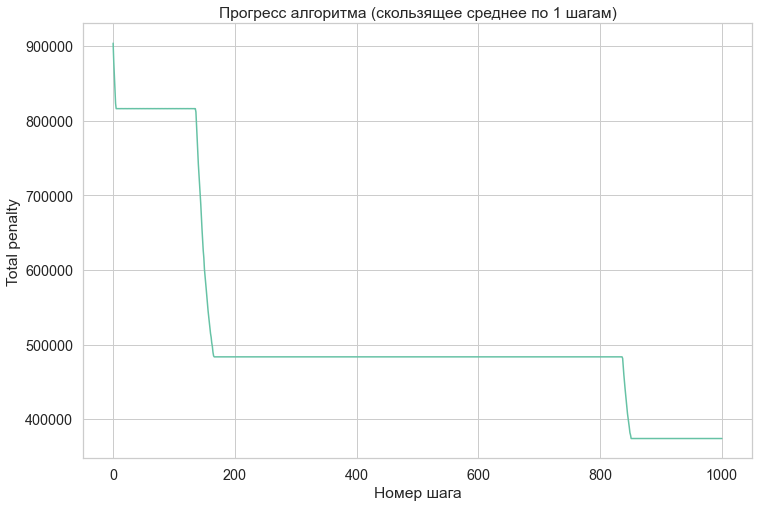

In [5]:
window_size = 1
make_plot('results/total_penalties.txt', 'plots/total_penalties.png', 
        'Номер шага', 'Total penalty', f'Прогресс алгоритма (скользящее среднее по {window_size} шагам)', 
        window_size=window_size)